# Test Case 3 Calculating interaction of randomly generated particles in 3D space

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from scipy.special import lpmn, factorial
from fast_multipole_method import Vlm
from fast_multipole_method import operation as op

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')
def plot_3d(x):
    """plot particles in 3 dimentional"""
    y = np.transpose(x)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(y[0], y[1], y[2])
    ax = ax.view_init(30)
    plt.show()
    return 

In [3]:
#case 3.1 construction: random particles
num_particles = 100
x_i = np.ndarray(shape=(3, num_particles))
x_i[0] = 20 * np.random.rand(num_particles) - 10
x_i[1] = 20 * np.random.rand(num_particles) - 10
x_i[2] = 20 * np.random.rand(num_particles) - 10
x_i = np.transpose(x_i)
q = np.ones(num_particles)

In [4]:
#case 3.2 construction: uniform distributed particles:
num_particles_in_a_box = 1
num_particels_1D = 3
num_particles = num_particles_in_a_box * num_particels_1D **3
x_i = np.zeros(shape=(num_particles,3))

for i in range(0,num_particels_1D):
    for j in range(0,num_particels_1D):
        for k in range(0,num_particels_1D):
            x_i[i*num_particels_1D*num_particels_1D+j*num_particels_1D+k] = [i,j,k] 

q = np.ones(num_particles)

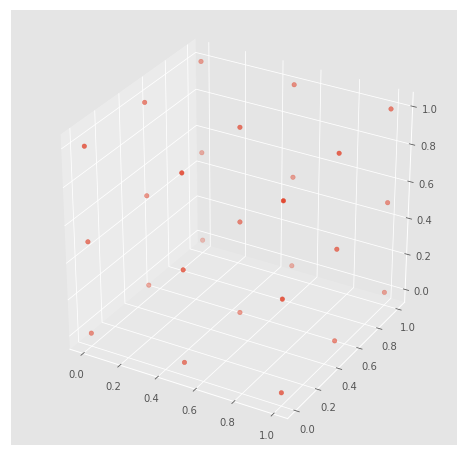

In [5]:
[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x_i)
plot_3d(x0_i)

In [6]:
scale_factor

array([0.        , 2.00000002])

import timeit

start = timeit.default_timer()

[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x_i)

stop = timeit.default_timer()

print(stop - start) 

In [7]:
# analytical answer
pair_potential = np.zeros(shape=(num_particles,num_particles)) 
for i in range(0, num_particles):
    for j in range(i+1, num_particles):
        pair_potential[i][j] = 1 / (op.distance_cal(x0_i[i], x0_i[j]) * scale_factor[1])
        
pair_potential

array([[0.        , 1.        , 0.5       , 1.        , 0.70710678,
        0.4472136 , 0.5       , 0.4472136 , 0.35355339, 1.        ,
        0.70710678, 0.4472136 , 0.70710678, 0.57735027, 0.40824829,
        0.4472136 , 0.40824829, 0.33333333, 0.5       , 0.4472136 ,
        0.35355339, 0.4472136 , 0.40824829, 0.33333333, 0.35355339,
        0.33333333, 0.28867513],
       [0.        , 0.        , 1.        , 0.70710678, 1.        ,
        0.70710678, 0.4472136 , 0.5       , 0.4472136 , 0.70710678,
        1.        , 0.70710678, 0.57735027, 0.70710678, 0.57735027,
        0.40824829, 0.4472136 , 0.40824829, 0.4472136 , 0.5       ,
        0.4472136 , 0.40824829, 0.4472136 , 0.40824829, 0.33333333,
        0.35355339, 0.33333333],
       [0.        , 0.        , 0.        , 0.4472136 , 0.70710678,
        1.        , 0.35355339, 0.4472136 , 0.5       , 0.4472136 ,
        0.70710678, 1.        , 0.40824829, 0.57735027, 0.70710678,
        0.33333333, 0.40824829, 0.4472136 , 0.3535

In [8]:
J_analytic = np.zeros(num_particles)
for i in range(0, num_particles):
    for j in range(0, num_particles):
        if j<i:
            J_analytic[i] += pair_potential[j][i]
        if j>i:
            J_analytic[i] += pair_potential[i][j]

J_analytic

array([13.45603236, 15.02672924, 13.45603236, 15.02672924, 16.88810287,
       15.02672924, 13.45603236, 15.02672924, 13.45603236, 15.02672924,
       16.88810287, 15.02672924, 16.88810287, 19.10408353, 16.88810287,
       15.02672924, 16.88810287, 15.02672924, 13.45603236, 15.02672924,
       13.45603236, 15.02672924, 16.88810287, 15.02672924, 13.45603236,
       15.02672924, 13.45603236])

In [9]:
total_energy = 0.5 * sum(J_analytic)
total_energy

204.20085524682005

In [10]:
from fast_multipole_method import fmm
from fmm_source import q_particle

In [11]:
# build list of q_source
q_source = np.ndarray(shape=(len(x0_i)), dtype=q_particle) 
for i in range(0, len(x0_i)):
    q_source[i] = q_particle(x0_i[i], q[i])

In [12]:
btm_level = 3
p = 10
ws_index = 4
[J_far_field, J_near_field] = fmm(q_source, btm_level, p, scale_factor[1], ws_index)

constructions of level 3; WS_index=4
constructions of level 2; WS_index=4
constructions finished, procede to evaluation of interactions
interactions at level  3
Start to evaluating J far field matrix
Start to evaluating J near field matrix
J matrix ecaluation finished!


In [13]:
J_far_field

array([7.75736175, 6.33649479, 7.75736175, 6.33649479, 3.92184754,
       6.33649479, 7.75736175, 6.33649479, 7.75736175, 6.33649479,
       3.92184754, 6.33649479, 3.92184754, 0.        , 3.92184754,
       6.33649479, 3.92184754, 6.33649479, 7.75736175, 6.33649479,
       7.75736175, 6.33649479, 3.92184754, 6.33649479, 7.75736175,
       6.33649479, 7.75736175])

In [14]:
J_near_field

array([ 5.69867061,  8.69023444,  5.69867061,  8.69023444, 12.96625533,
        8.69023444,  5.69867061,  8.69023444,  5.69867061,  8.69023444,
       12.96625533,  8.69023444, 12.96625533, 19.10408353, 12.96625533,
        8.69023444, 12.96625533,  8.69023444,  5.69867061,  8.69023444,
        5.69867061,  8.69023444, 12.96625533,  8.69023444,  5.69867061,
        8.69023444,  5.69867061])

In [15]:
J_total = J_far_field + J_near_field
J_total

array([13.45603236, 15.02672924, 13.45603236, 15.02672924, 16.88810287,
       15.02672924, 13.45603236, 15.02672924, 13.45603236, 15.02672924,
       16.88810287, 15.02672924, 16.88810287, 19.10408353, 16.88810287,
       15.02672924, 16.88810287, 15.02672924, 13.45603236, 15.02672924,
       13.45603236, 15.02672924, 16.88810287, 15.02672924, 13.45603236,
       15.02672924, 13.45603236])

In [16]:
total_energy = 0.5 * sum(J_total)
total_energy

204.20085524682858

In [17]:
J_error = np.abs(J_total-J_analytic) / J_analytic
J_error

array([2.02902341e-13, 6.43079479e-14, 2.66796116e-13, 6.45443742e-14,
       1.53778889e-13, 5.61512413e-14, 2.67060140e-13, 5.61512413e-14,
       2.10955069e-13, 6.44261610e-14, 1.53778889e-13, 5.63876675e-14,
       1.53778889e-13, 0.00000000e+00, 1.53778889e-13, 5.63876675e-14,
       1.53778889e-13, 1.76728644e-13, 2.67060140e-13, 5.60330281e-14,
       2.11087080e-13, 5.62694544e-14, 1.53778889e-13, 1.76610430e-13,
       2.11351104e-13, 1.76728644e-13, 3.48511502e-14])

In [19]:
if True:
    print('s')

s
